In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import seaborn as sns

#these are user defined modules
import plot
import calculate

### Cohort Analysis

For each (filtered) cohort analyze how the distribution of publications and citations changes in the cohort over time.
At the beginning all scientists should be equal (they have zero publications and citations). Over time some scientists become more productive and/or successful than others which leads to an increase in the Gini coefficient.

### Read Gender details

In [3]:
# read gender details - the column names are name, gender - change it to author, gender
gender = pd.read_csv('./data/name_gender_1970_2016_noAsians.csv')
gender.rename(columns={'name':'author'}, inplace=True)
print(gender.head())
print(gender['gender'].unique())
print(gender.groupby('gender').size())
#TODO: also show proportion! What is the percentage of men and women?

print(gender['author'].nunique())

             author gender
0    nima mesgarani      m
1    james j. abbas      m
2  eberhart zrenner      m
3    emery n. brown      m
4        ilya rybak      m
['m' 'none' 'f']
gender
f        974493
m       4493870
none     325482
dtype: int64
1129473


### Read authors with start and end year details

In [4]:
# Different files exists depending upon their career length
# CAREER_LENGTH = 15 means the authors who have atleast 15 years of experience
CAREER_LENGTH_LIST = [0,5,10,15,20,25]
CAREER_LENGTH = 15
#max_years = 15

authorStartEndCareerData = pd.read_csv('./data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')

print('authorStartEndCareerData before filtering - ',authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData[authorStartEndCareerData["start_year"] >= 1970]
print('authorStartEndCareerData after filtering - ',authorStartEndCareerData.shape[0])

#authorStartEndCareerData = pd.read_csv('data/authors-scientific-atleast-'+str(CAREER_LENGTH)+'-year.csv')
print(authorStartEndCareerData.head())

#print("authorStartEndCareerData  %s", authorStartEndCareerData.shape[0])
print("author unique names  - ", authorStartEndCareerData['author'].nunique())
#print(authorStartEndCareerData[authorStartEndCareerData['author']=='a min tjoa'])

('authorStartEndCareerData before filtering - ', 110888)
('authorStartEndCareerData after filtering - ', 110888)
               author  start_year  end_year  total_num_pub  career_length
0          a min tjoa        1979      2015            193             36
1    a-imam al-sammak        1992      2008              6             16
2          a-xing zhu        1998      2015             16             17
3  a. a. (louis) beex        1980      2016             34             36
4     a. a. a. nasser        1993      2014              3             21
('author unique names  - ', 110888)


### Merge credible authors and their gender information

In [5]:
authorStartEndCareerData = pd.merge(authorStartEndCareerData, gender, how="left", on=["author"])
# for authors whose gender not found, replace it with none
authorStartEndCareerData['gender'] = authorStartEndCareerData['gender'].fillna('none')
print(authorStartEndCareerData.head())

print("authorStartEndCareerData with duplicates: %s", authorStartEndCareerData.shape[0])
authorStartEndCareerData = authorStartEndCareerData.drop_duplicates()
print("authorStartEndCareerData no duplicates: %s", authorStartEndCareerData.shape[0])
# print(authorStartEndCareerData['author'].nunique())

#axes = authorStartEndCareerData.boxplot(column='pub_count', by='gender', return_type='axes')
#for ax in axes.values():
#    ax.set_ylim(0, 200)
#plt.show()


             author  start_year  end_year  total_num_pub  career_length gender
0        a min tjoa        1979      2015            193             36   none
1  a-imam al-sammak        1992      2008              6             16      m
2  a-imam al-sammak        1992      2008              6             16      m
3  a-imam al-sammak        1992      2008              6             16      m
4  a-imam al-sammak        1992      2008              6             16      m
('authorStartEndCareerData with duplicates: %s', 2368899)
('authorStartEndCareerData no duplicates: %s', 110888)


### Read Publication data

In [6]:
authorPublicationData = pd.read_csv('./data/author_publications_1970_2016_asiansAsNone.txt')
print('authorPublicationData before filtering - ',authorPublicationData.shape[0])
authorPublicationData = authorPublicationData[authorPublicationData["year"] >= 1970]
print('authorPublicationData after filtering - ',authorPublicationData.shape[0])

authorPublicationData = authorPublicationData.groupby(['year','author']).count().reset_index()
authorPublicationData.rename(columns={'pub_id':'num_pub'}, inplace=True)
print(authorPublicationData.head())

print(authorStartEndCareerData.head())
##remove wrong data
#authorPublicationData = authorPublicationData[authorPublicationData["year"] > 1900]
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])

print(np.unique(authorStartEndCareerData["start_year"]))


('authorPublicationData before filtering - ', 9078240)
('authorPublicationData after filtering - ', 9078240)
   year         author  num_pub
0  1970    a. a. afifi        1
1  1970    a. a. bährs        1
2  1970     a. armenti        1
3  1970  a. b. slomson        1
4  1970    a. brindley        1
                author  start_year  end_year  total_num_pub  career_length  \
0           a min tjoa        1979      2015            193             36   
1     a-imam al-sammak        1992      2008              6             16   
7           a-xing zhu        1998      2015             16             17   
8   a. a. (louis) beex        1980      2016             34             36   
42     a. a. a. nasser        1993      2014              3             21   

   gender  
0    none  
1       m  
7    none  
8    none  
42   none  
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 

### Merge Publications with credible authors and their gender information

In [7]:
#authorPublicationData = pd.merge(authorPublicationData, authorStartEndCareerData,  
#                                          how="left", left_on="author", right_on="author")

authorPublicationData = pd.merge(authorPublicationData, authorStartEndCareerData, how="left", on=["author"])


print("authorPublicationData before filtering: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.dropna(how='any')
print("authorPublicationData after filtering: %s", authorPublicationData.shape[0])

print("authorPublicationData with duplicates: %s", authorPublicationData.shape[0])
authorPublicationData = authorPublicationData.drop_duplicates()
print("authorPublicationData no duplicates: %s", authorPublicationData.shape[0])

#print(authorPublicationData.head(n=2))
print(authorPublicationData['author'].nunique())
#print(authorPublicationData.shape[0])

print(authorPublicationData.head())
#print(authorPublicationData[authorPublicationData.author=="a min tjoa"])


('authorPublicationData before filtering: %s', 4704589)
('authorPublicationData after filtering: %s', 1253560)
('authorPublicationData with duplicates: %s', 1253560)
('authorPublicationData no duplicates: %s', 1253560)
110888
    year                 author  num_pub  start_year  end_year  total_num_pub  \
4   1970            a. brindley        1        1970      2002              2   
5   1970  a. brinton cooper iii        2        1970      1996              5   
17  1970             a. j. cole        1        1970      1991              6   
22  1970            a. jennings        1        1970      1988              3   
23  1970               a. jones        1        1970      2014              9   

    career_length gender  
4              32   none  
5              26      m  
17             21   none  
22             18   none  
23             44   none  


/home/kandy/python-virtual-env/cum-adv/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


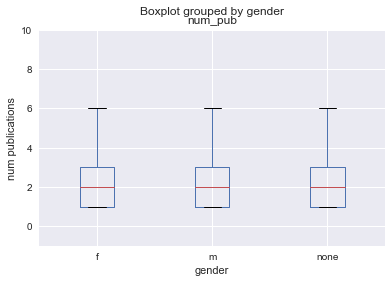

   year       author  num_pub  start_year  end_year  total_num_pub  \
4  1970  a. brindley        1        1970      2002              2   

   career_length gender  
4             32   none  


In [8]:
pl = authorPublicationData.boxplot(column='num_pub', by='gender', showfliers=False)
pl.set_xlabel('gender')
pl.set_ylabel('num publications')
pl.set_ylim([-1,10])
plt.show()

print(authorPublicationData.head(n=1))

### Cohort Analysis on all authors for 15 years

In [9]:
print(authorPublicationData.head(n=1))

groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(3))
print(np.unique(groupByYearData["year"]))

groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 1, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(3))
print(np.unique(groupByYearData["year"]))

   year       author  num_pub  start_year  end_year  total_num_pub  \
4  1970  a. brindley        1        1970      2002              2   

   career_length gender  
4             32   none  
        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31      f  
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
       year            author  num_pub  start_year  end_year  total_num_pub  \
49885  1985  donatella sciuto        1     

In [10]:
years = groupByYearData['year'].unique()
years = sorted(years)
print(years)

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
   cohort_start_year  cohort_size  year      gini  career_age
0               1970        12226  1970  0.206795           0
1               1970        12226  1971  0.294351           1
2               1970        12226  1972  0.322485           2
3               1970        12226  1973  0.271669           3
4               1970        12226  1974  0.289196           4

/home/kandy/python-virtual-env/cum-adv/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/kandy/python-virtual-env/cum-adv/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


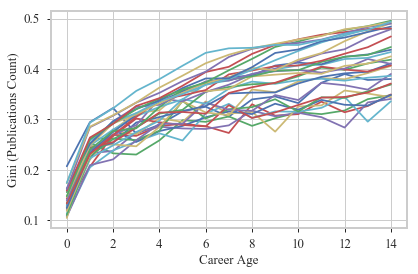

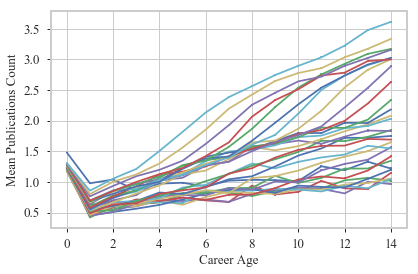

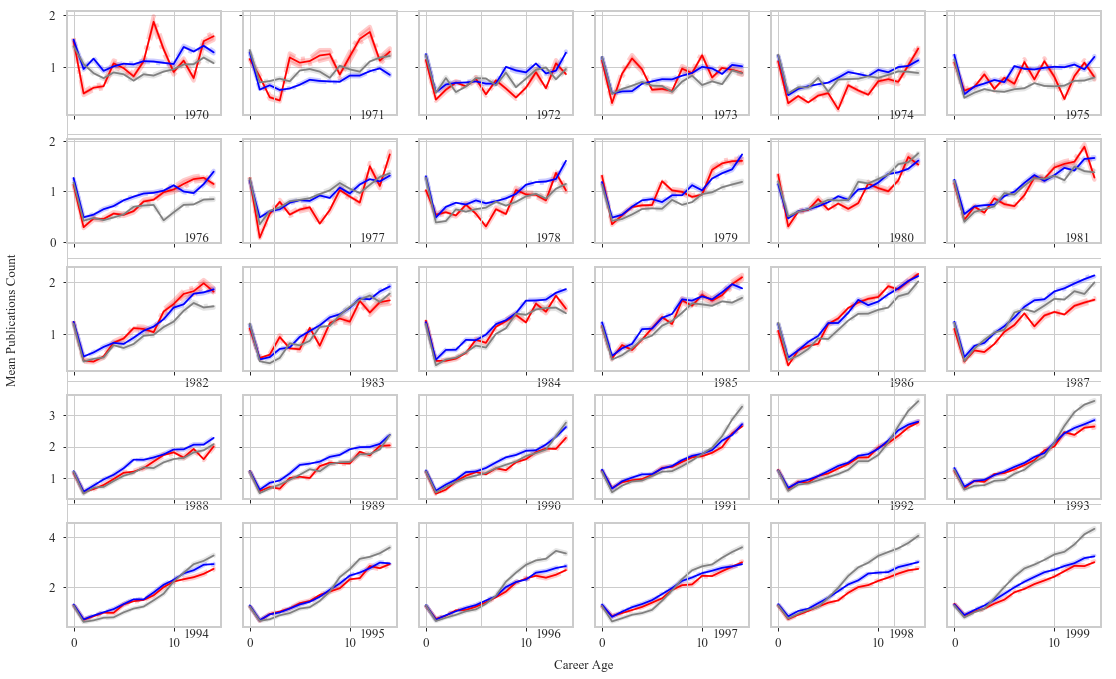

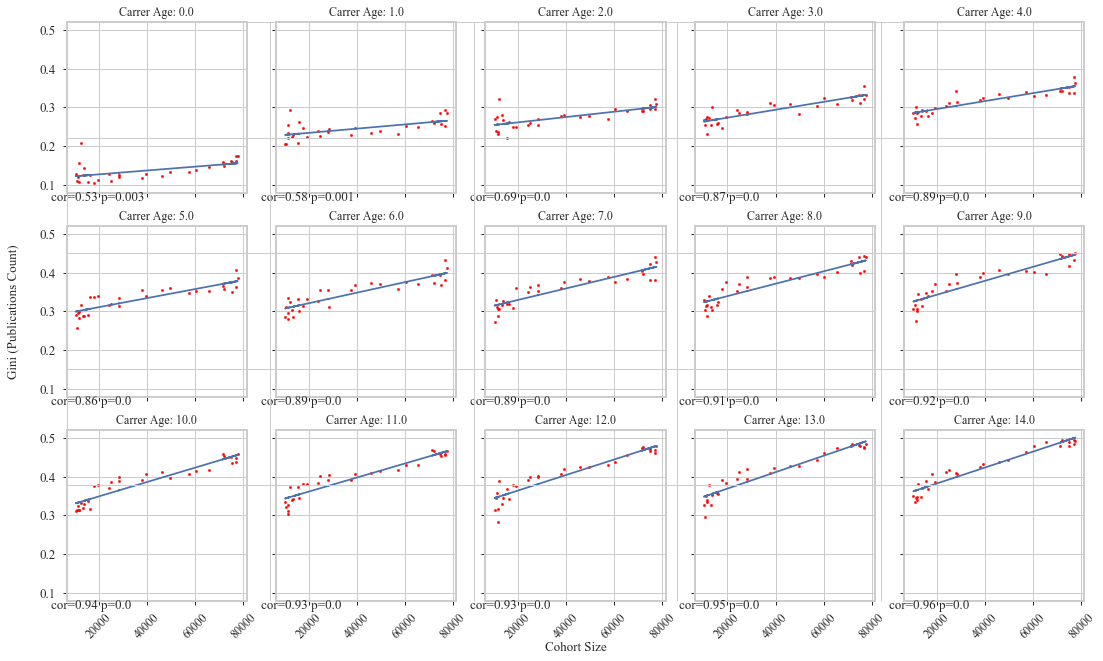

In [11]:
#just for debugging
#reload(plot)
#reload(calculate)
plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', years, 15, 'Publications Count')

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
   cohort_start_year  cohort_size  year      gini  career_age
0               1970        12226  1970  0.206795           0
1               1970        12226  1971  0.245009           1
2               1970        12226  1972  0.298886           2
3               1970        12226  1973  0.314239           3
4               1970        12226  1974  0.329894           4


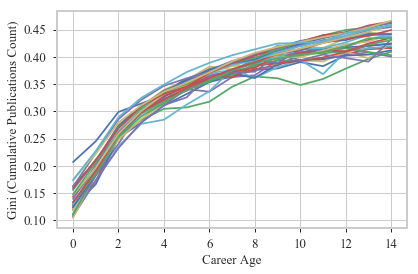

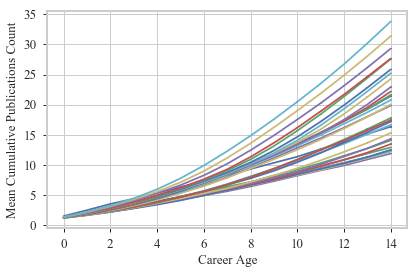

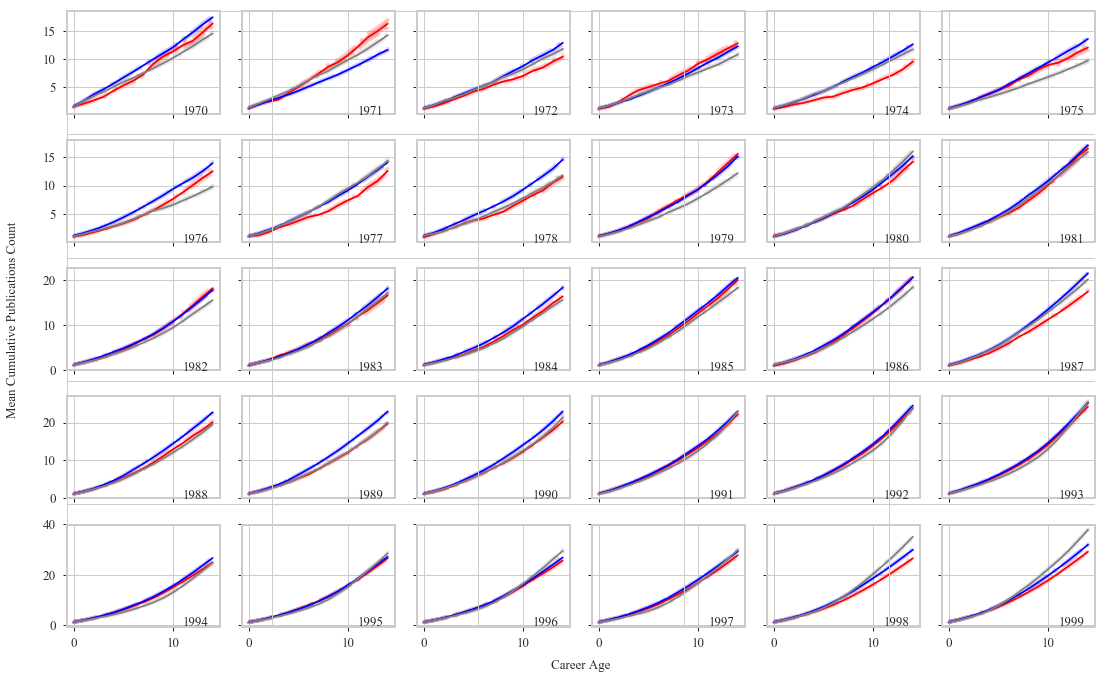

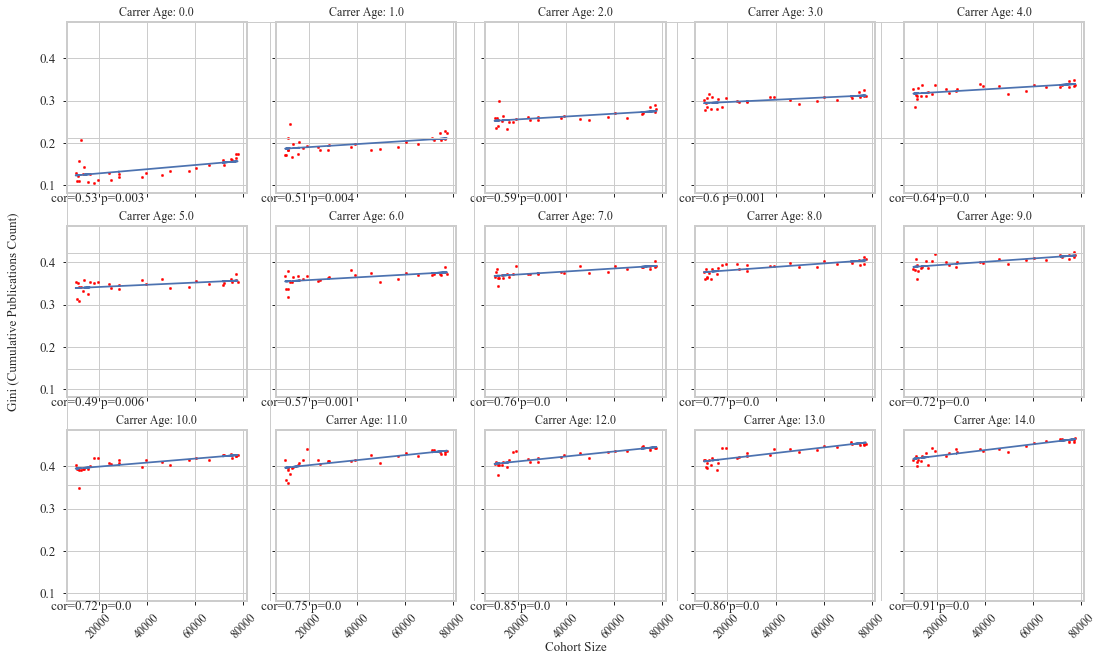

In [12]:
#just for debugging
#from importlib import reload
#reload(plot)
#reload(calculate)

plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', years, 15,'Cumulative Publications Count')

#plot.plot_cohort_analysis_on(groupCitationsByAuthorYearData, 'num_cit', 'Citations Count')

### Regression Analysis of mean productivity on Inequality for all authors for 15 years

- There is no relation at all - Reg. coefficient is 0

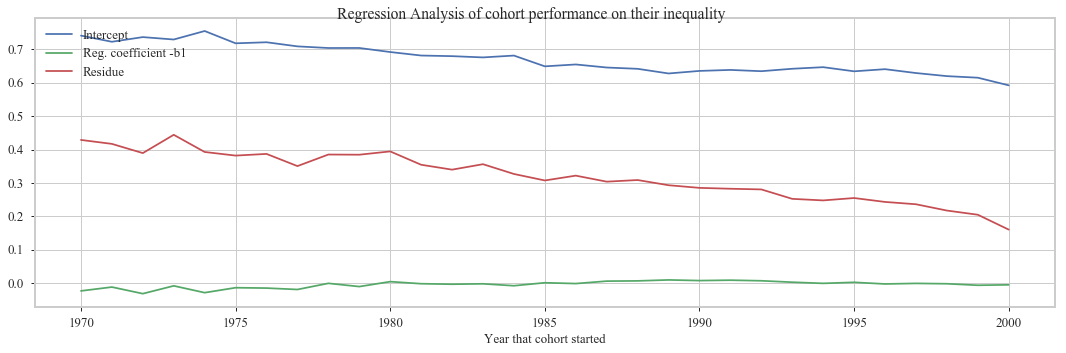

In [13]:
#just for debugging
#reload(plot)
#reload(calculate)
data = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', years, 15)


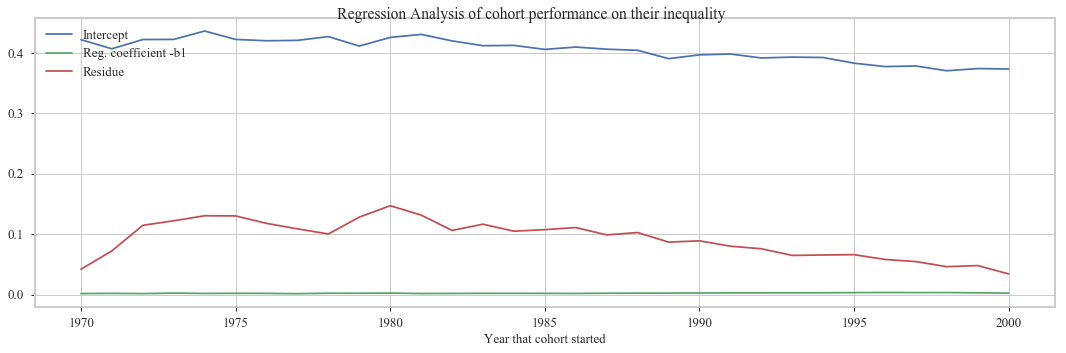

In [14]:
#just for debugging
#reload(plot)
#reload(calculate)
data = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', years, 15)

### Cohort Analysis, Regression analysis on authors grouped by 2 years for 15 years

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

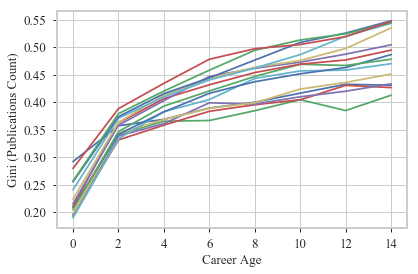

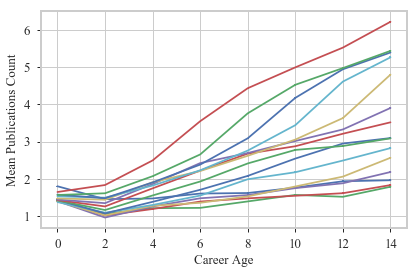

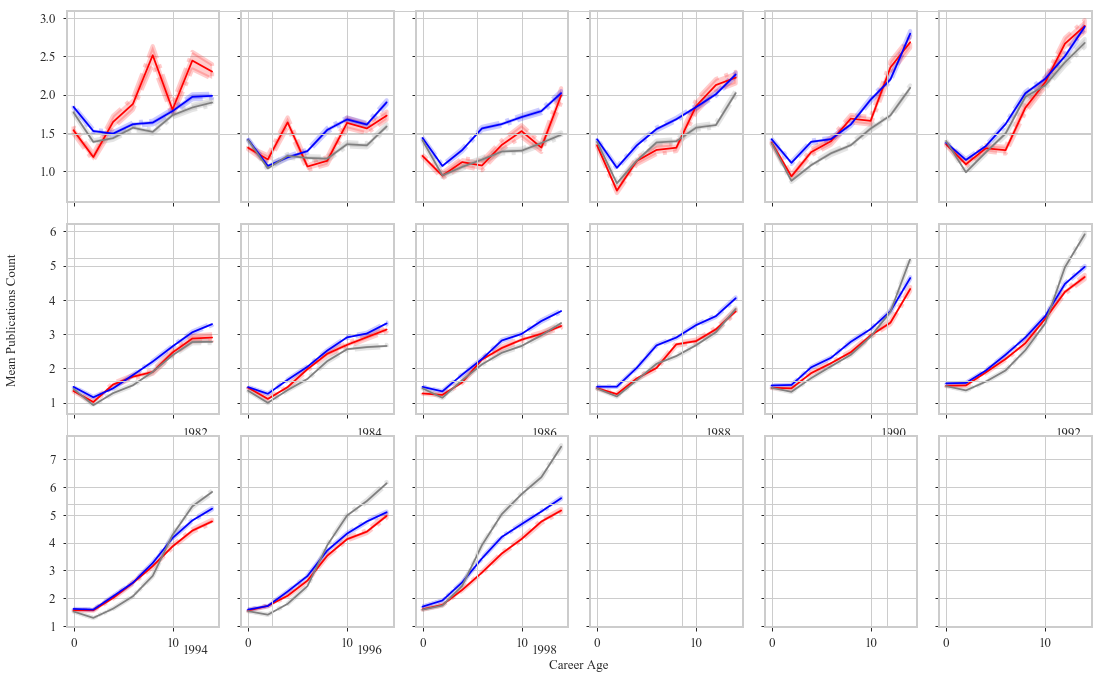

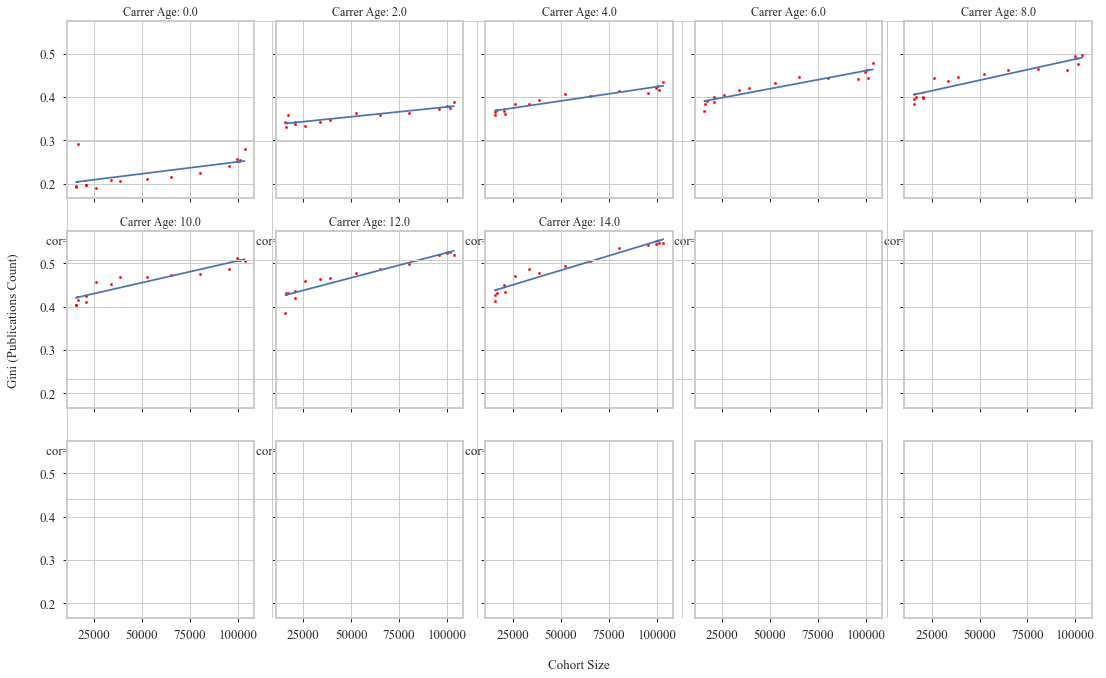

[1970, 1972, 1974, 1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998]
   cohort_start_year  cohort_size  year      gini  career_age
0               1970        16772  1970  0.292235           0
1               1970        16772  1972  0.311714           2
2               1970        16772  1974  0.345381           4
3               1970        16772  1976  0.357941           6
4               1970        16772  1978  0.381897           8


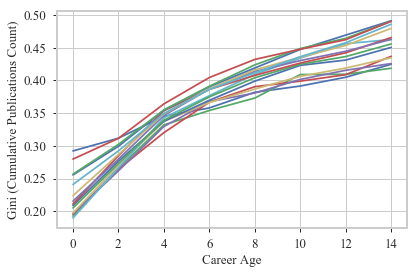

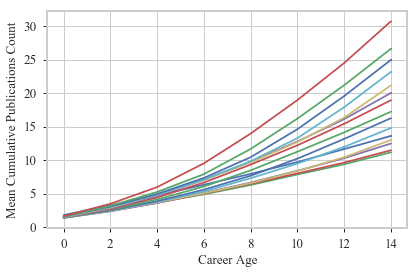

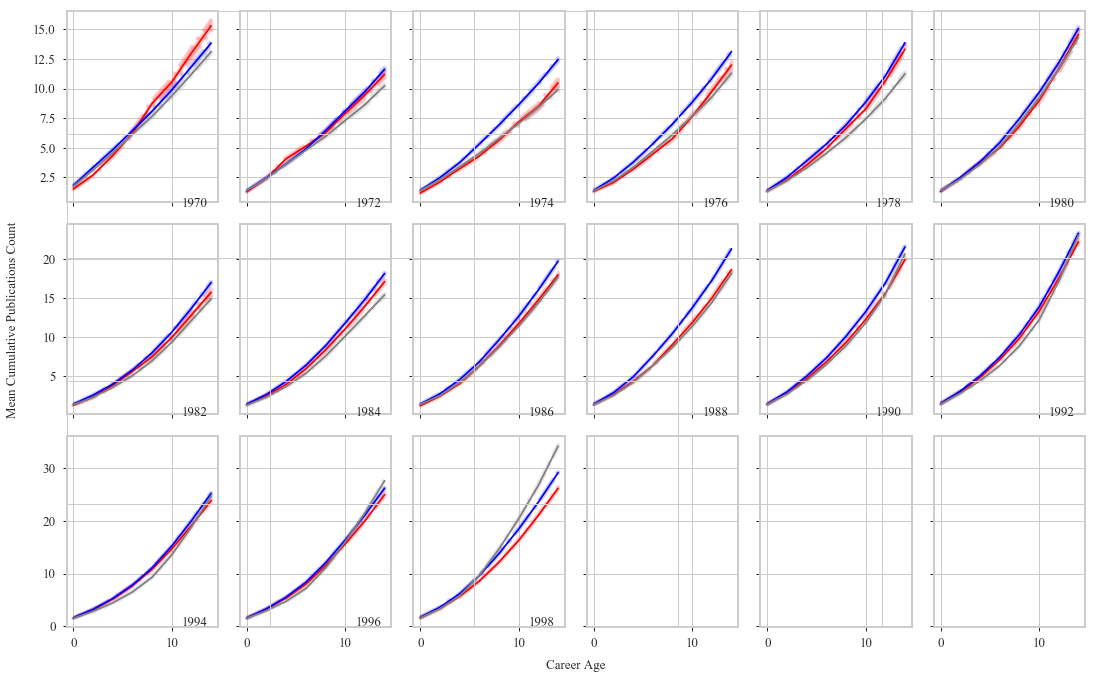

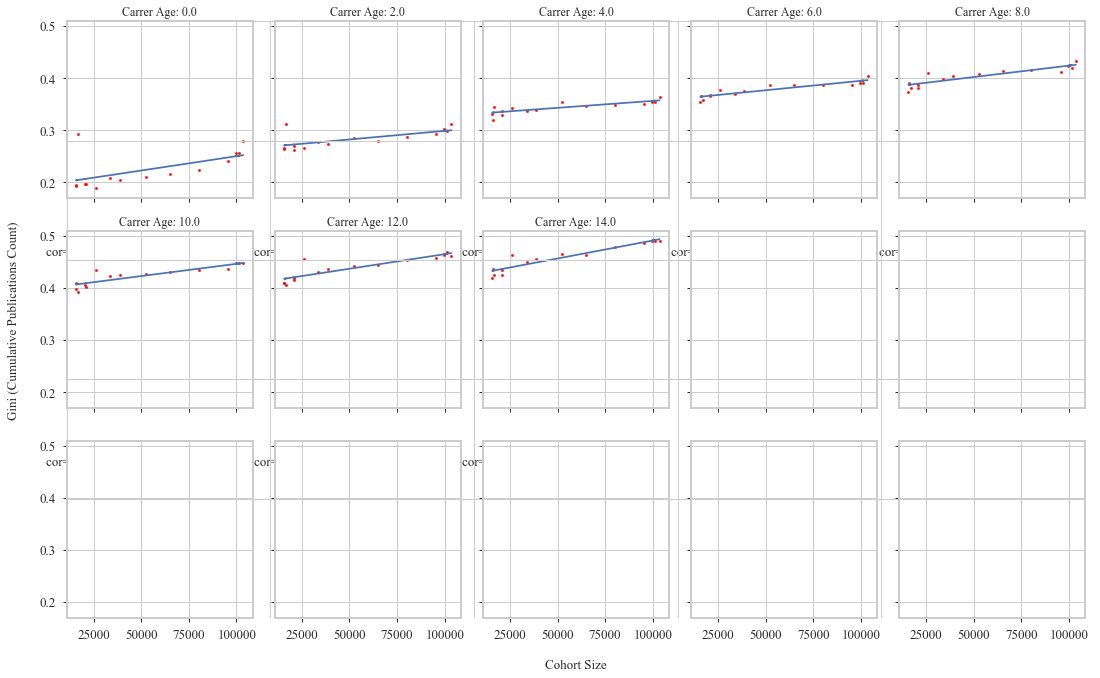

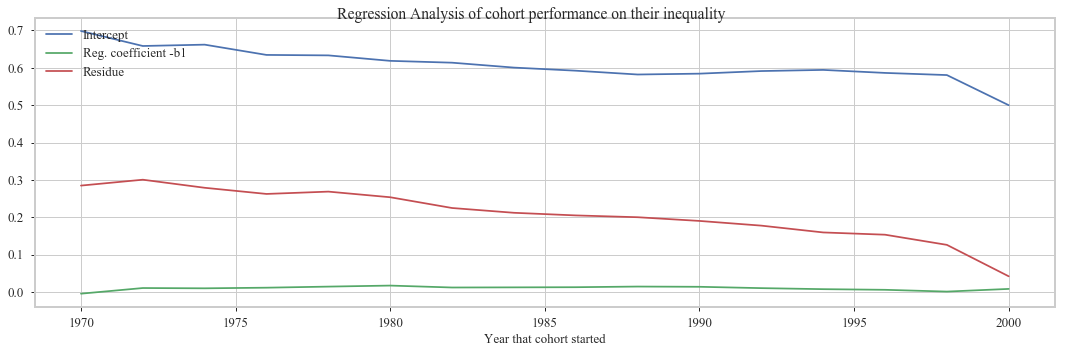

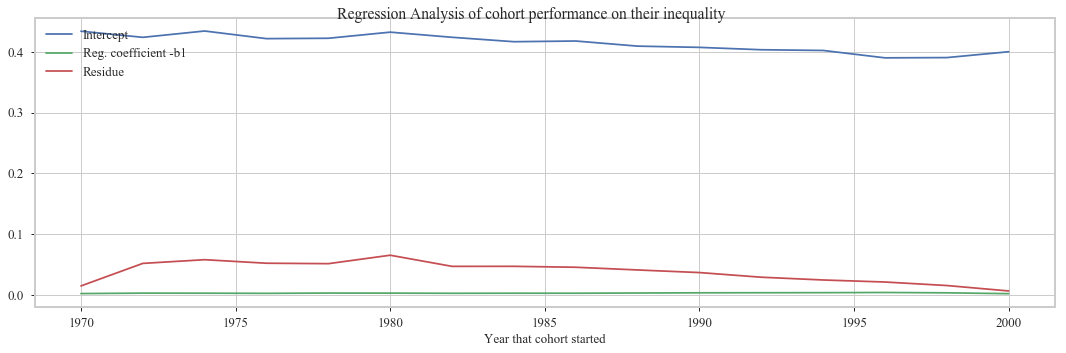

In [15]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 2, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

years = groupByYearData['year'].unique()
years = sorted(years)
print(years)

plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', years, 15, 'Publications Count')
plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', years, 15, 'Cumulative Publications Count')
data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', years, 15)
data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', years, 15)

### Cohort Analysis, Regression analysis on authors grouped by 3 years for 15 years

        year            author  num_pub  start_year  end_year  total_num_pub  \
88431   1985  donatella sciuto        1        1985      2016            348   
117504  1987  donatella sciuto        1        1985      2016            348   
135512  1988  donatella sciuto        2        1985      2016            348   
156919  1989  donatella sciuto        1        1985      2016            348   
181582  1990  donatella sciuto        2        1985      2016            348   
210693  1991  donatella sciuto        4        1985      2016            348   
243763  1992  donatella sciuto        4        1985      2016            348   
282907  1993  donatella sciuto        9        1985      2016            348   
329488  1994  donatella sciuto       13        1985      2016            348   
381623  1995  donatella sciuto       15        1985      2016            348   

        career_length gender  
88431              31      f  
117504             31      f  
135512             31     

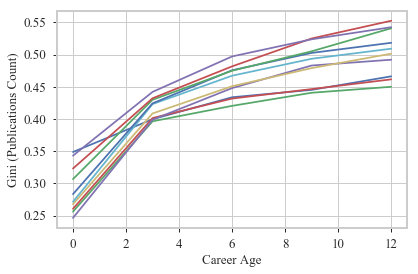

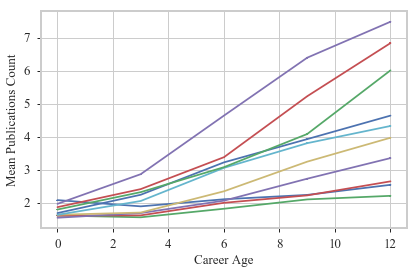

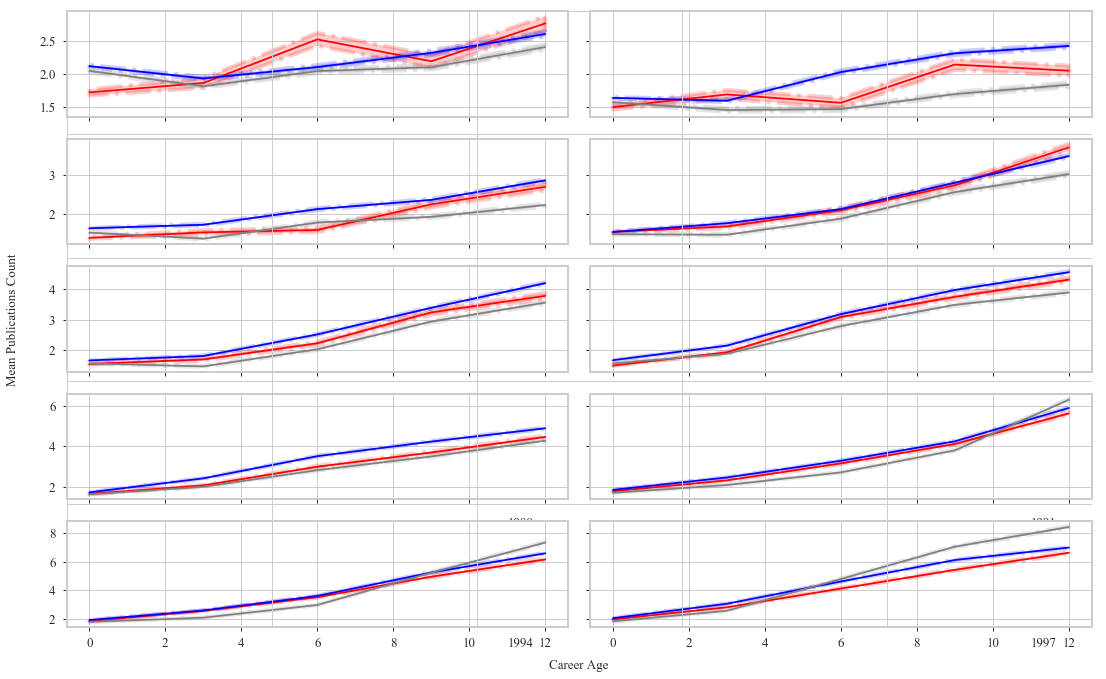

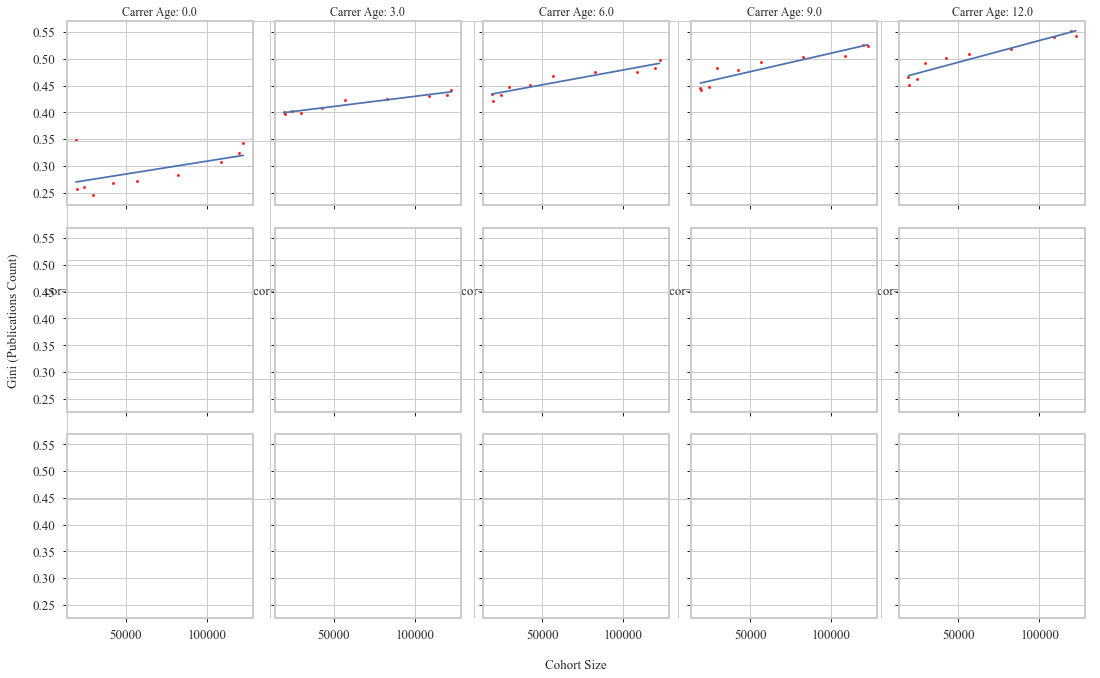

[1970, 1973, 1976, 1979, 1982, 1985, 1988, 1991, 1994, 1997]
   cohort_start_year  cohort_size  year      gini  career_age
0               1970        19134  1970  0.348763           0
1               1970        19134  1973  0.348279           3
2               1970        19134  1976  0.382655           6
3               1970        19134  1979  0.403816           9
4               1970        19134  1982  0.424477          12


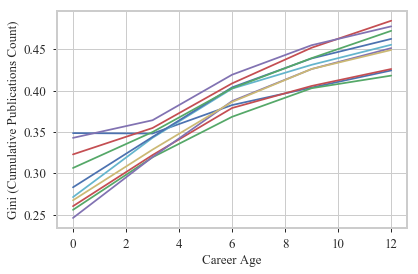

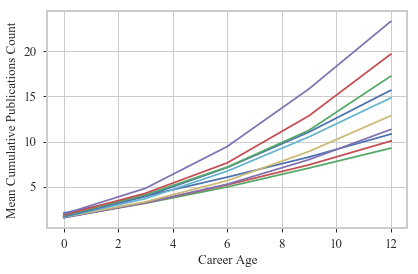

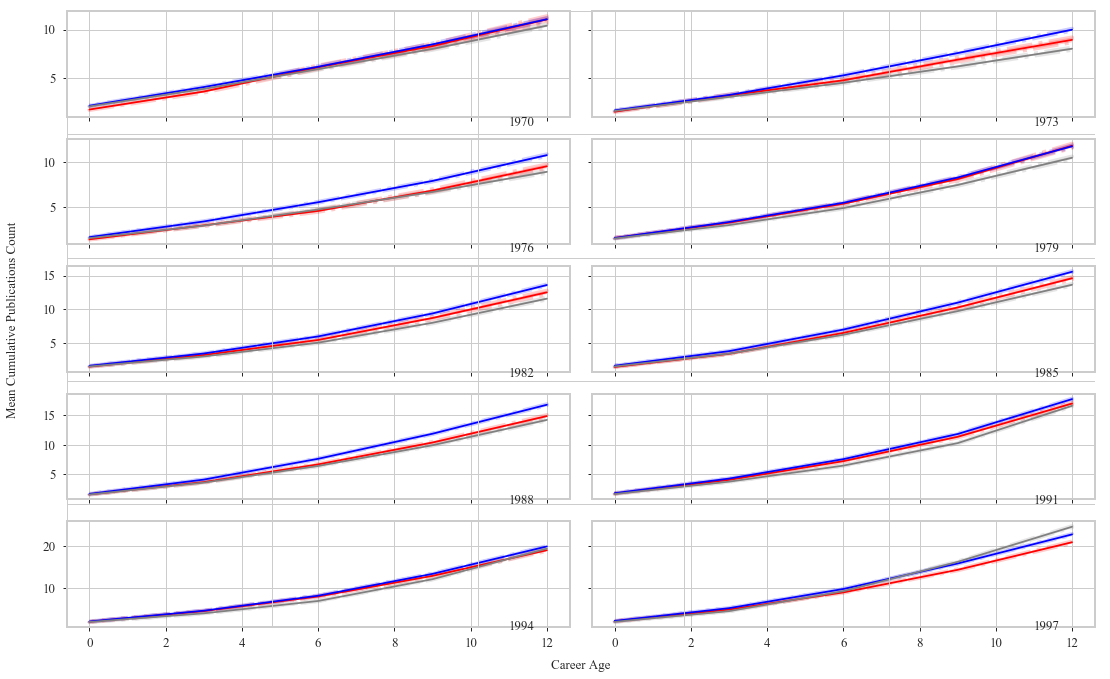

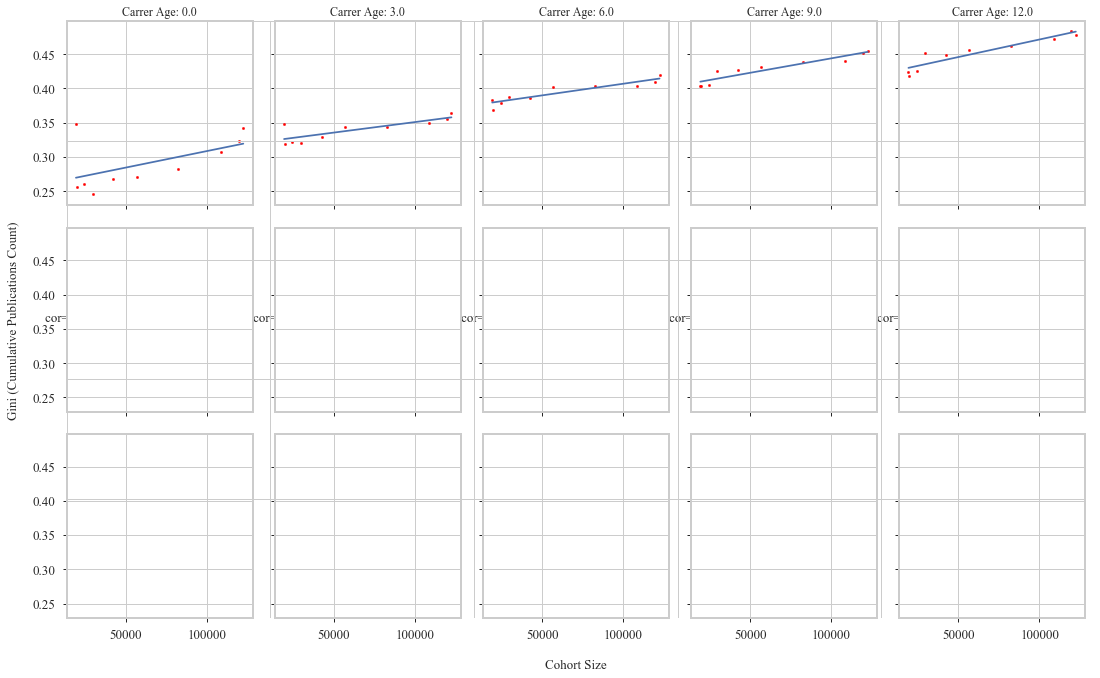

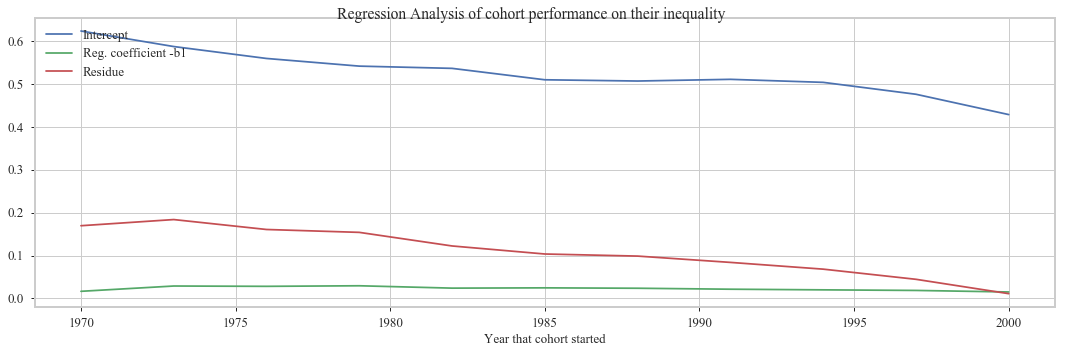

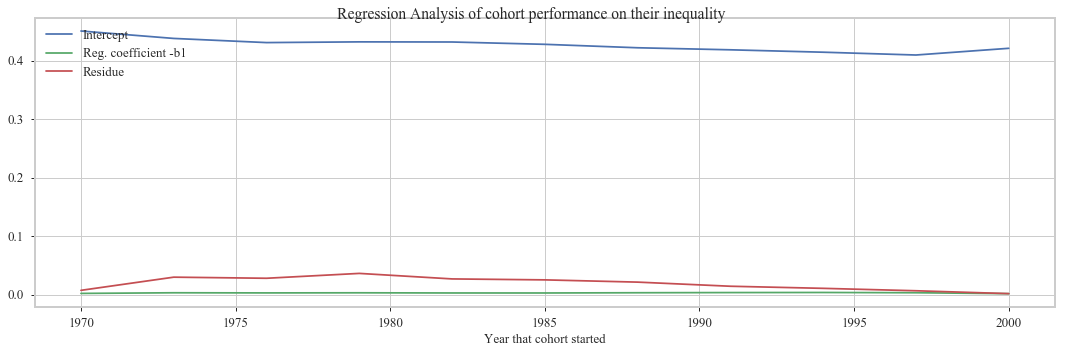

In [16]:
groupByYearData = authorPublicationData.copy(deep=True)
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))
groupByYearData = calculate.groupDataAndCalculateCumulativeValues(groupByYearData, 3, 'num_pub')
print(groupByYearData[groupByYearData['author'] == 'donatella sciuto'].head(10))

years = groupByYearData['year'].unique()
years = sorted(years)
print(years)

plot.plot_cohort_analysis_on(groupByYearData, 'num_pub', years, 15, 'Publications Count')
plot.plot_cohort_analysis_on(groupByYearData, 'cum_num_pub', years, 15, 'Cumulative Publications Count')
data1 = plot.plot_regress_performance_on_inequality(groupByYearData, 'num_pub', years, 15)
data2 = plot.plot_regress_performance_on_inequality(groupByYearData, 'cum_num_pub', years, 15)